In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk 


In [3]:
# import cleaned data

df = pd.read_csv('../data_processing/reviews_cleaned.csv')

In [4]:
df.head()

,profile_name,user_reviews,summary,text,stars
0,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5
1,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5
2,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5
3,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5
4,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5


In [5]:
# let's warm up with little bit eda analysis

df.describe()

,stars
count,2730.000000
mean,4.294505
std,1.017476
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
# add id 

df['id'] = [i+1 for i in df.index]
df.head()

,profile_name,user_reviews,summary,text,stars,id
0,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5,1
1,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5,2
2,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5,3
3,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5,4
4,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5,5


In [7]:
# change data type, 

df['user_reviews'] = df['user_reviews'].str.replace(',','').str.strip() # first I had to remove any comma for thousands
df['user_reviews'] = df['user_reviews'].apply(pd.to_numeric, errors = 'coerce').\
                                        astype('Int64') # change column type to numeric

In [8]:
df.dtypes

profile_name    object
user_reviews     Int64
summary         object
text            object
stars            int64
id               int64
dtype: object

In [9]:
df.describe()

,user_reviews,stars,id
count,2730.0,2730.000000,2730.000000
mean,41.277289,4.294505,1365.500000
std,81.766457,1.017476,788.227442
min,1.0,1.000000,1.000000
25%,7.0,4.000000,683.250000
50%,18.0,5.000000,1365.500000
75%,43.0,5.000000,2047.750000
max,1744.0,5.000000,2730.000000


<Axes: title={'center': 'Count of Reviews by Stars'}, xlabel='Review Stars'>

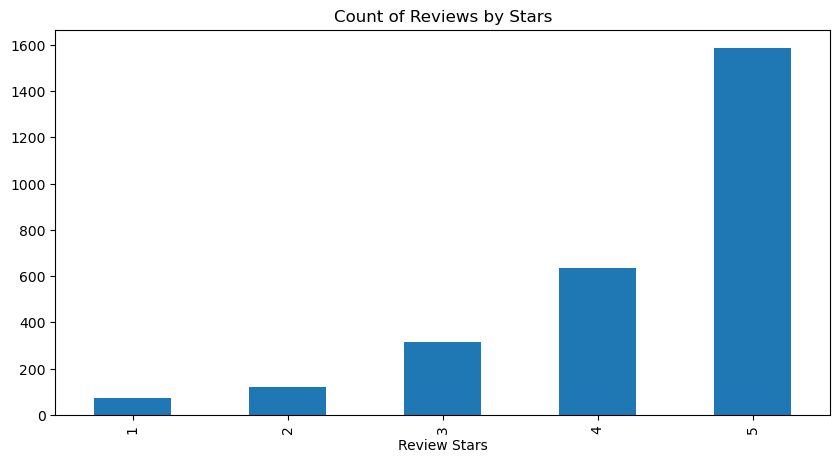

In [10]:
ax = df['stars'].value_counts().\
            sort_index().\
            plot(kind='bar',
                title='Count of Reviews by Stars',
                figsize=(10, 5))

ax.set_xlabel('Review Stars')
ax

In [11]:
text = df['text']
text.head()

0    We were recommended to go here while in Paphos...
1    Had some food and a few beers, as a band playe...
2    What a lovely evening, the staff couldn’t of b...
3    2nd night out of 4 for us. Had to go back as o...
4    Food really good,  fantastic service, and danc...
Name: text, dtype: object

In [12]:
ex = df['text'][24]
ex

'Visited this restaurant from a recommendation, cabaret entertainment kept the children entertained.  Food was not very good the night we visited, we were a family of 8 and 3 of the burgers  that was ordered was not good at all.  We had quite a long...More'

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

sia = SentimentIntensityAnalyzer()

In [14]:
#we store the sentiment in a dictionary
res={}

for i, r in tqdm(df.iterrows(), total = len(df)):
    text = r['text']
    myid = r['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/2730 [00:00<?, ?it/s]

In [15]:
df

,profile_name,user_reviews,summary,text,stars,id
0,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5,1
1,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5,2
2,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5,3
3,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5,4
4,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5,5
...,...,...,...,...,...,...
2725,PartyGal,3,expensive and a rip off,On arrival at the restaurant we was greeted by...,3,2726
2726,LJWB,48,Family fun & huge portions!,"Eat here most times we visit Paphos, choice of...",4,2727
2727,LeedsBuffy,1,"Fantastic food, fantastic atmosphere, fantasti...",I e-mailed the restaurant prior to going on ho...,5,2728
2728,lynrevell,51,Good fun,Went to Fat Mamas for a meal on my last night ...,4,2729


In [16]:
# convert the dictionary into dataframe and merge it into the df

vaders_sentiment = pd.DataFrame(res).T 
vaders_sentiment.reset_index(inplace=True)
vaders_sentiment.rename(columns={'index': 'id'}, inplace=True)
vaders_sentiment = vaders_sentiment.merge(df, how='left')

In [17]:
vaders_sentiment.head()

,id,neg,neu,pos,compound,profile_name,user_reviews,summary,text,stars
0,1,0.055,0.724,0.222,0.8604,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5
1,2,0.000,0.611,0.389,0.9022,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5
2,3,0.000,0.660,0.340,0.9552,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5
3,4,0.000,0.746,0.254,0.9762,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5
4,5,0.000,0.684,0.316,0.9093,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5


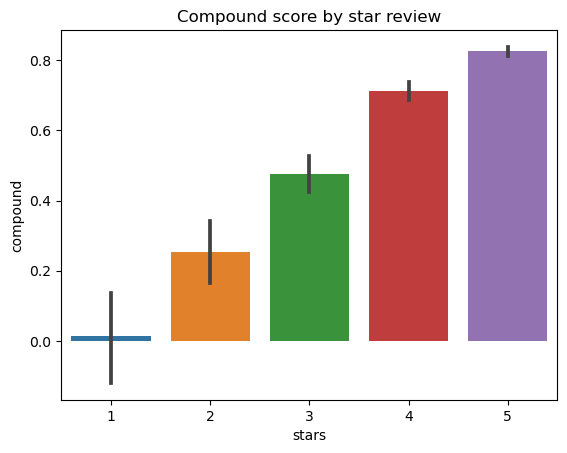

In [18]:
ax = sns.barplot(data=vaders_sentiment, x='stars', y='compound')
ax.set_title('Compound score by star review')
plt.show()

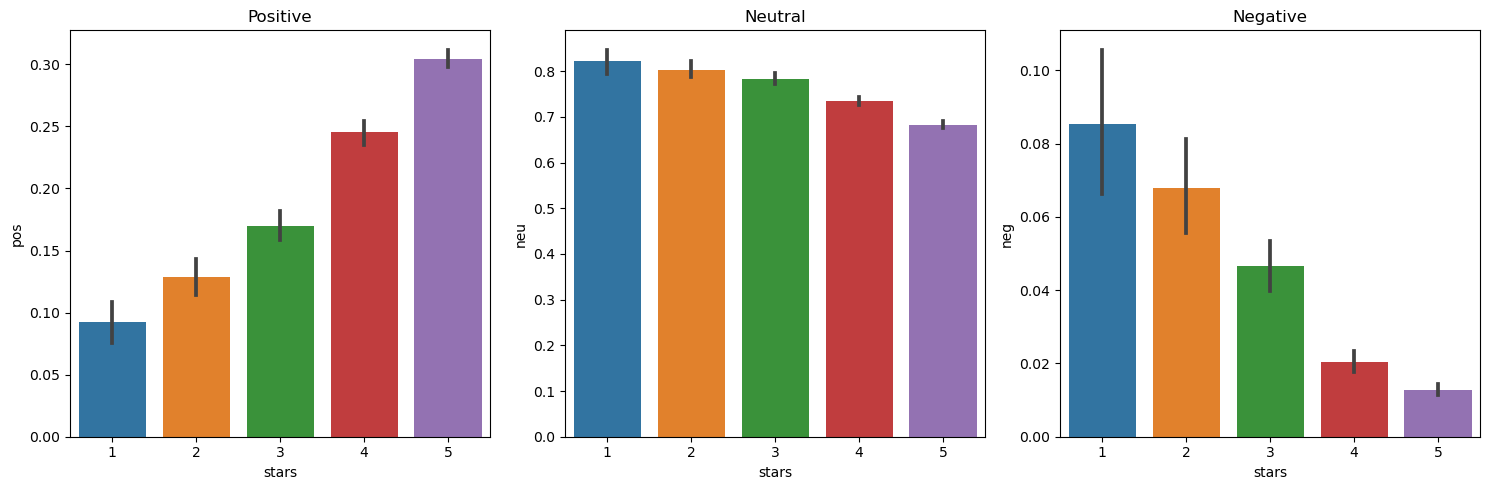

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data = vaders_sentiment, x='stars', y='pos', ax = axs[0])
sns.barplot(data = vaders_sentiment, x='stars', y='neu', ax = axs[1])
sns.barplot(data = vaders_sentiment, x='stars', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [20]:
# let's see where the model does the opposite of what we think it should do

vaders_sentiment.query('stars == 1').sort_values('pos', ascending=False)['text'].values[0]

"It's almost the end of our 2 week holiday in Cyprus and we've eaten out almost every night and had amazing food every night. we'd heard a lot of good things about Fat Mamas The amazing show and fabulous food etc and how you will...More"

In [21]:
# What is the overall sentiment score for the restaurant based on the reviews?

vaders_sentiment['compound'].mean()

0.7113263736263737

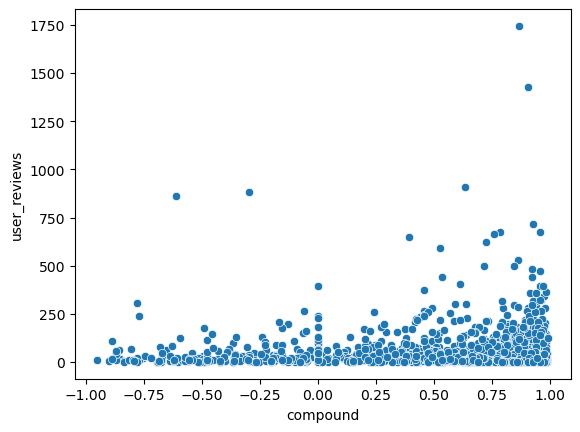

In [22]:
sns.scatterplot(data = vaders_sentiment, x='compound', y='user_reviews')
plt.show()

In [23]:
# load date reviewd to get more information

rating_date = pd.read_csv('../data_processing/rating_date.csv')

In [24]:
# merge the tables

merged_df = pd.merge(vaders_sentiment, rating_date, right_index = True, left_index = True)
merged_df.head()

,id,neg,neu,pos,compound,profile_name,user_reviews,summary,text,stars,Unnamed: 0,rating_date
0,1,0.055,0.724,0.222,0.8604,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5,0,30/01/2022
1,2,0.000,0.611,0.389,0.9022,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5,1,29/01/2022
2,3,0.000,0.660,0.340,0.9552,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5,2,28/01/2022
3,4,0.000,0.746,0.254,0.9762,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5,3,23/01/2022
4,5,0.000,0.684,0.316,0.9093,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5,4,22/01/2022


In [25]:
merged_df['rating_date'] = pd.to_datetime(merged_df['rating_date'], format='%d/%m/%Y', dayfirst=True)


In [26]:
merged_df.dtypes

id                       int64
neg                    float64
neu                    float64
pos                    float64
compound               float64
profile_name            object
user_reviews             Int64
summary                 object
text                    object
stars                    int64
Unnamed: 0               int64
rating_date     datetime64[ns]
dtype: object

In [27]:
merged_df.drop(columns=['id', 'Unnamed: 0'], inplace=True)

In [28]:
merged_df.head()

,neg,neu,pos,compound,profile_name,user_reviews,summary,text,stars,rating_date
0,0.055,0.724,0.222,0.8604,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5,2022-01-30
1,0.000,0.611,0.389,0.9022,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5,2022-01-29
2,0.000,0.660,0.340,0.9552,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5,2022-01-28
3,0.000,0.746,0.254,0.9762,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5,2022-01-23
4,0.000,0.684,0.316,0.9093,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5,2022-01-22


In [29]:
# let's find out the most reviewd profile

merged_df['profile_name'].value_counts()

Craigk186337          6
kiddy34               4
blueterrier_11        4
michelledT3822CP      3
Laura M               3
                     ..
roy_watkins771        1
whalley12             1
AVA577                1
JamesA833             1
MartinRobinson1987    1
Name: profile_name, Length: 2594, dtype: int64

In [30]:
merged_df.loc[merged_df['profile_name'] == 'Craigk186337']

# as we can see mr. craigk the last time he came was 5 years ago, we can invite him to try our new dishes and get 
# enternaited from the new cabaret show

,neg,neu,pos,compound,profile_name,user_reviews,summary,text,stars,rating_date
495,0.081,0.721,0.198,0.8074,Craigk186337,104,Great as usual but....,Love this place and have been coming here for ...,4,2018-01-31
829,0.000,0.764,0.236,0.9241,Craigk186337,104,It is a very good night,I've been coming here for 7 years. The food is...,4,2017-01-02
1314,0.000,0.615,0.385,0.9593,Craigk186337,104,Awesome,"Sat in here as I type this. Great service, ver...",5,2016-01-17
1683,0.045,0.646,0.309,0.9401,Craigk186337,104,They have listened,The entertainment has always been very good he...,4,2015-01-06
2606,0.060,0.713,0.227,0.8531,Craigk186337,104,OK again.,"Visited two weeks ago. Food is average, chips ...",3,2012-01-09
2703,0.046,0.714,0.240,0.7507,Craigk186337,104,Ok,Went here a couple of times. Entertainment was...,3,2011-01-22


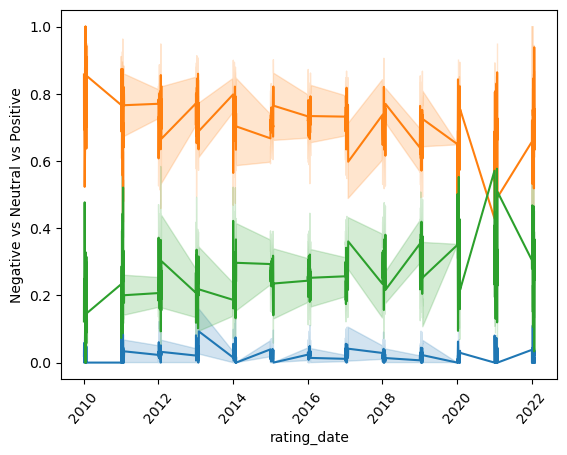

In [31]:

sns.lineplot(data=merged_df, x='rating_date', y='neg')
sns.lineplot(data=merged_df, x='rating_date', y='neu')
sns.lineplot(data=merged_df, x='rating_date', y='pos')


plt.ylabel('Negative vs Neutral vs Positive')
plt.xticks(rotation=50)
plt.show()

In [32]:
# group data by month and calculate the mean sentiment

monthly_sentiment = merged_df.groupby(pd.Grouper(key='rating_date', freq='M'))[['neg','neu','pos']].mean()

In [33]:
monthly_sentiment = monthly_sentiment.dropna()
monthly_sentiment

,neg,neu,pos
rating_date,,,
2010-01-31,0.017294,0.806647,0.176118
2011-01-31,0.025914,0.734155,0.239948
2012-01-31,0.026191,0.733288,0.240517
2013-01-31,0.028704,0.738091,0.233204
2014-01-31,0.020967,0.728604,0.250410
2015-01-31,0.019754,0.716246,0.264002
2016-01-31,0.024221,0.723028,0.252753
2017-01-31,0.027935,0.714893,0.257152
2018-01-31,0.016823,0.701806,0.281368


In [34]:
fig = px.line(monthly_sentiment, x=monthly_sentiment.index, y=['neg','neu','pos'], title='Sentiment of reviews over time')
fig.update_xaxes(type='category')
fig.show()

In [35]:
monthly_sentiment['total'] = monthly_sentiment.sum(axis = 1)

In [36]:
fig = px.bar(monthly_sentiment, x=monthly_sentiment.index, y=['neg','neu','pos'], title='Sentiment of reviews over time',
              barmode = 'stack')
fig.update_layout(xaxis_title='Month', yaxis_title='Sentiment Score', legend_title='Sentiment')
fig.show()

In [37]:
monthly_compound = merged_df.groupby(pd.Grouper(key='rating_date', freq='M'))['compound'].mean()

In [38]:
merged_df['year'] = merged_df['rating_date'].dt.year
merged_df['month'] = merged_df['rating_date'].dt.year # xD loooolllllldsfklsadfhlasj

In [39]:
df_grouped = merged_df.groupby(['year', 'month'])['compound'].mean()

In [40]:
df_grouped

year  month
2010  2010     0.602488
2011  2011     0.652769
2012  2012     0.643069
2013  2013     0.646093
2014  2014     0.716586
2015  2015     0.728849
2016  2016     0.705072
2017  2017     0.676231
2018  2018     0.763029
2019  2019     0.790849
2020  2020     0.835082
2021  2021     0.828682
2022  2022     0.703030
Name: compound, dtype: float64

In [41]:
merged_df.drop(columns='month', inplace=True)

In [42]:
merged_df['month'] = merged_df['rating_date'].dt.month

In [43]:
grouped_df = merged_df.groupby(['year', 'month'])['compound'].mean()

In [44]:
grouped_df 
# so the problem that we are facing is that we have only extracted the first month of each year, or we did something wrong with 
# with the cleaning of the data


year  month
2010  1        0.602488
2011  1        0.652769
2012  1        0.643069
2013  1        0.646093
2014  1        0.716586
2015  1        0.728849
2016  1        0.705072
2017  1        0.676231
2018  1        0.763029
2019  1        0.790849
2020  1        0.835082
2021  1        0.828682
2022  1        0.703030
Name: compound, dtype: float64

In [46]:
merged_df = merged_df.drop(columns='rating_date', inplace=True)
merged_df

In [49]:
fixed_dates = pd.read_csv('../data_processing/fixed_dates.csv')
fixed_dates.head()

,Unnamed: 0,rating_date
0,0,30/10/2022
1,1,29/10/2022
2,2,28/10/2022
3,3,23/10/2022
4,4,22/10/2022


In [67]:
vaders_merged = pd.merge(vaders_sentiment, fixed_dates, right_index=True, left_index=True)
vaders_merged

,id,neg,neu,pos,compound,profile_name,user_reviews,summary,text,stars,Unnamed: 0,rating_date
0,1,0.055,0.724,0.222,0.8604,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5,0,30/10/2022
1,2,0.000,0.611,0.389,0.9022,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5,1,29/10/2022
2,3,0.000,0.660,0.340,0.9552,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5,2,28/10/2022
3,4,0.000,0.746,0.254,0.9762,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5,3,23/10/2022
4,5,0.000,0.684,0.316,0.9093,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5,4,22/10/2022
...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2726,0.000,0.875,0.125,0.6901,PartyGal,3,expensive and a rip off,On arrival at the restaurant we was greeted by...,3,2725,18/07/2010
2726,2727,0.000,1.000,0.000,0.0000,LJWB,48,Family fun & huge portions!,"Eat here most times we visit Paphos, choice of...",4,2726,17/07/2010
2727,2728,0.000,0.804,0.196,0.8591,LeedsBuffy,1,"Fantastic food, fantastic atmosphere, fantasti...",I e-mailed the restaurant prior to going on ho...,5,2727,05/07/2010
2728,2729,0.000,0.785,0.215,0.7452,lynrevell,51,Good fun,Went to Fat Mamas for a meal on my last night ...,4,2728,22/06/2010


In [68]:
vaders_merged.drop(columns=['id', 'Unnamed: 0'], inplace=True)


In [70]:
vaders_merged # hehehe now that's lot better, how the fuk I did not notice it from the start, still noob I guess

,neg,neu,pos,compound,profile_name,user_reviews,summary,text,stars,rating_date
0,0.055,0.724,0.222,0.8604,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5,30/10/2022
1,0.000,0.611,0.389,0.9022,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5,29/10/2022
2,0.000,0.660,0.340,0.9552,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5,28/10/2022
3,0.000,0.746,0.254,0.9762,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5,23/10/2022
4,0.000,0.684,0.316,0.9093,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5,22/10/2022
...,...,...,...,...,...,...,...,...,...,...
2725,0.000,0.875,0.125,0.6901,PartyGal,3,expensive and a rip off,On arrival at the restaurant we was greeted by...,3,18/07/2010
2726,0.000,1.000,0.000,0.0000,LJWB,48,Family fun & huge portions!,"Eat here most times we visit Paphos, choice of...",4,17/07/2010
2727,0.000,0.804,0.196,0.8591,LeedsBuffy,1,"Fantastic food, fantastic atmosphere, fantasti...",I e-mailed the restaurant prior to going on ho...,5,05/07/2010
2728,0.000,0.785,0.215,0.7452,lynrevell,51,Good fun,Went to Fat Mamas for a meal on my last night ...,4,22/06/2010


In [71]:
vaders_merged['rating_date'] = pd.to_datetime(vaders_merged['rating_date'], dayfirst=True)

In [72]:
vaders_merged.dtypes

neg                    float64
neu                    float64
pos                    float64
compound               float64
profile_name            object
user_reviews             Int64
summary                 object
text                    object
stars                    int64
rating_date     datetime64[ns]
dtype: object

In [74]:
vaders_merged['month'] = vaders_merged['rating_date'].dt.month
vaders_merged['year'] = vaders_merged['rating_date'].dt.year
print(vaders_merged)


        neg    neu    pos  compound        profile_name  user_reviews  \
0     0.055  0.724  0.222    0.8604        peterbH5107W            16   
1     0.000  0.611  0.389    0.9022     relinquishedall             8   
2     0.000  0.660  0.340    0.9552   audreysouthampton             5   
3     0.000  0.746  0.254    0.9762       pauladK1021PE             1   
4     0.000  0.684  0.316    0.9093            Le5ley63            30   
...     ...    ...    ...       ...                 ...           ...   
2725  0.000  0.875  0.125    0.6901            PartyGal             3   
2726  0.000  1.000  0.000    0.0000                LJWB            48   
2727  0.000  0.804  0.196    0.8591          LeedsBuffy             1   
2728  0.000  0.785  0.215    0.7452           lynrevell            51   
2729  0.000  0.672  0.328    0.9437  MartinRobinson1987            20   

                                                summary  \
0                            Excellent food and cabaret   
1    

In [75]:
vaders_merged.head()

,neg,neu,pos,compound,profile_name,user_reviews,summary,text,stars,rating_date,month,year
0,0.055,0.724,0.222,0.8604,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5,2022-10-30,10,2022
1,0.000,0.611,0.389,0.9022,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5,2022-10-29,10,2022
2,0.000,0.660,0.340,0.9552,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5,2022-10-28,10,2022
3,0.000,0.746,0.254,0.9762,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5,2022-10-23,10,2022
4,0.000,0.684,0.316,0.9093,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5,2022-10-22,10,2022


In [ ]:
# what I want to find out?
# an idea that popped now is to compare the summary sentiment with the text sentiment. Find out if they have differences.
# I could also create a day column to find out if there are any differences in each day for example if at the start of 
# each month the sentiment is higher or lower, but I don't think is worth it
# for now lets group by month and find out on which months of the year the sentiment is higher and the opposite


In [76]:
group_month = vaders_merged.groupby('month')['compound'].mean()
group_month_df = pd.DataFrame(group_month).reset_index.copy()

In [100]:
grouped_month.columns

Index(['month', 'compound'], dtype='object')

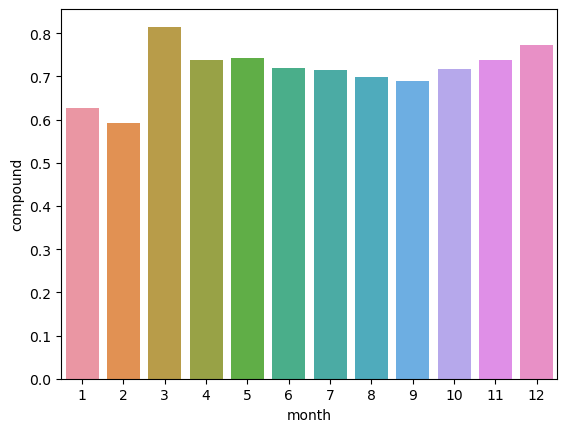

In [102]:
sns.barplot(data=grouped_month, x='month', y='compound')
plt.show()

In [103]:
# as we can see the sentiment on the first month is lower than the last months.
# all I know is that the restaurant is opened March till October and the last day is on halloween

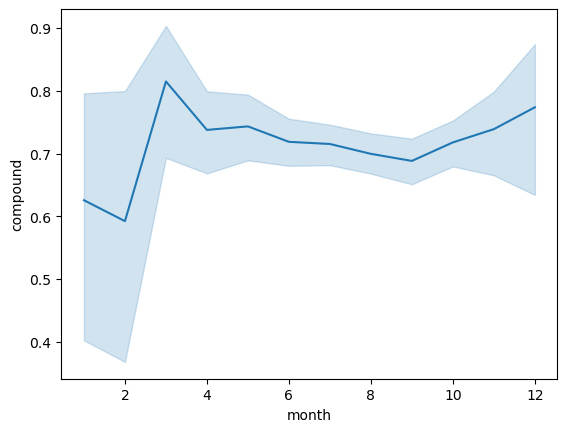

In [117]:
sns.lineplot(data=vaders_merged, x='month', y='compound')
plt.show()

In [120]:
fig = px.histogram(vaders_merged, x='year', y=['neg', 'neu', 'pos'])
fig

In [131]:
group_neg = vaders_merged.groupby('month')['neg'].mean()
group_neu = vaders_merged.groupby('month')['neu'].mean()
group_pos = vaders_merged.groupby('month')['pos'].mean()

grouped_sentiment = pd.concat([group_neg, group_neu, group_pos], axis=1)
month_histogram = pd.DataFrame(grouped_sentiment).reset_index().copy()

In [135]:
month_histogram

,month,neg,neu,pos
0,1,0.033778,0.769278,0.197000
1,2,0.029000,0.704880,0.266160
2,3,0.016000,0.650367,0.333567
3,4,0.029011,0.712000,0.259011
4,5,0.025731,0.698045,0.276199
5,6,0.019714,0.712169,0.268117
6,7,0.021254,0.725994,0.252761
7,8,0.023660,0.719706,0.256624
8,9,0.024206,0.715458,0.260345
9,10,0.021430,0.720065,0.258503


In [132]:
month_histogram.columns

Index(['month', 'neg', 'neu', 'pos'], dtype='object')

In [137]:
fig = px.bar(month_histogram, x='month', y=['neg', 'neu', 'pos'], barmode='group')
fig.show()

In [138]:
fig = px.bar(month_histogram, x='month', y=['neg', 'pos'], barmode='group')
fig.show()

In [139]:
total = len(vaders_merged)
pos_count = (vaders_merged['pos'] > 0).sum()
neg_count = (vaders_merged['neg'] > 0).sum()

# Calculate percentages
pos_pct = pos_count / total * 100
neg_pct = neg_count / total * 100

# Create a dataframe with the percentages
data = {'sentiment': ['positive', 'negative'], 'percentage': [pos_pct, neg_pct]}
df = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df, values='percentage', names='sentiment')
fig.show()


In [141]:
vaders_merged['quarter'] = pd.PeriodIndex(vaders_merged['rating_date'], freq='Q')

for quarter in vaders_merged['quarter'].unique():
    quarter_data = vaders_merged[vaders_merged['quarter'] == quarter]
    total = len(quarter_data)
    pos_count = (quarter_data['pos'] > 0).sum()
    neg_count = (quarter_data['neg'] > 0).sum()
    pos_pct = pos_count / total * 100
    neg_pct = neg_count / total * 100
    data = {'sentiment': ['positive', 'negative'], 'percentage': [pos_pct, neg_pct]}
    df = pd.DataFrame(data)
    fig = px.pie(df, values='percentage', names='sentiment', title=f'Sentiment for {quarter}')
    fig.show()


In [145]:
# lets check the 2nd quearter of 2010

q2_2010 = vaders_merged.query("rating_date >= '2010-04-01' and rating_date <= '2010-06-30'")
q2_2010

# we 100% positive because there were only 2 reviews
# we can also do this for other quarters also

,neg,neu,pos,compound,profile_name,user_reviews,summary,text,stars,rating_date,month,year,quarter
2728,0.0,0.785,0.215,0.7452,lynrevell,51,Good fun,Went to Fat Mamas for a meal on my last night ...,4,2010-06-22,6,2010,2010Q2
2729,0.0,0.672,0.328,0.9437,MartinRobinson1987,20,How is the restaurant not up in the top...,How is the restaurant not up in the top ten at...,5,2010-06-21,6,2010,2010Q2


In [146]:
quarter_means = vaders_merged.groupby('quarter')['neg'].mean()
max_neg_quarter = quarter_means.idxmax()
print(f"The quarter with the highest mean negative sentiment is {max_neg_quarter}.")


The quarter with the highest mean negative sentiment is 2022Q1.
